## <font color='blue' size=8pt> Association Rules (Data Mining) </font>

## <font color='blue' size=6pt> Introduction </font>

### Main Idea: in data mining we want determine the most frequent subsets (itemset) from a large set.

Example: Imagine we have a set of sets such as, for example: $$\{\{a,b,c\},\{a,b,d,e\},\{a,c,e,f\},\{i,g,k,l\},\{a,b,h,g,n\},\{c,f,i,m\}\}$$

The subsets inside the bigger set can be referred as "transactions" if one imagine different purchases at a store.

<font color='red'>Question:</font> in the previous example what were the most frequent items purchased?

<font color='green'>Answer:</font> In that example we had a total of 6 transactions among which 4 transactions had the item "a" purchased and also 3 transactions had both items "a" and "b".

**Definition**: An association rule has two parts

    (i) an antecedent "if" and (ii) a consequent "then".
    
<font color='green'>An antecedent is an item found within the data; a consequent is an item found in combination with the antecedent.</font>

Thus, association rules can be established by algorithm that can search and count the frequent *if-then* patterns in a database.

<span style="font-family:Calibri; color:blue; font-size:14pt;">Main Goal:</span> apply efficient machine learning algorithms for analyzing associations or co-occurrences in a database.

During this lesson we are going to study and apply two important algorthms: <span style="font-family:Calibri; color:darkred; font-size:12pt;">APRIORI</span> and <span style="font-family:Calibri; color:darkgreen; font-size:12pt;">ECLAT</span>.

## <font color='blue' size='6pt'> The APRIORI Algorithm </font>

Proposed by R. Agrawal and R. Srikant in 1994 for finding frequent itemsets in a dataset for boolean association rule. Name of the algorithm is Apriori because it uses prior knowledge of frequent itemset properties. We apply an iterative approach or level-wise search where k-frequent itemsets are used to find k+1 itemsets.

The idea is to search for frequent *if-then* patterns; the algorithm uses the concepts of **support** and **confidence** in order to identify the most frequent (and thus relevant) relationships.

#### <span style="color:blue">Support:</span> is a measure of how frequently the items appear in the dataset of all transactions.

#### <span style="color:blue">Confidence:</span> represents the number of times the *if-then* statements are found true.

#### <span style="color:blue">Lift:</span> is metric that can help compare the confidence vs. the *expected* confidence.

#### <span style="color:green;font-size:12pt">Examples:</span>

**Support:** Chance you pick someone that took DATA 301 by random i.e. a probability such

$$\text{P}(\text{course taken = DATA301})=\frac{\text{The number of students who took DATA 301}}{\text{Total number of students}}$$

**Confidence:** Chance you pick someone that took DATA 310, given they’re in another course. This is a *conditional* probability, i.e.

$$\text{P}(\text{course taken = DATA301}|\text{course taken = DATA201})$$

**Lift:** Improvement in chance when you contrast support to confidence such as the ratio

$$\frac{\text{P}(\text{course taken = DATA301}|\text{course taken = DATA201})}{\text{P}(\text{course taken = DATA301})}$$

In summary:

**confidence**(C1, C2) = (# of students enrolled in course C1 and C2) / (# of students enrolled in C1)

**lift**(C1, C2) = **confidence**(C1, C2) / **support**(C2)

<span style="color:red;font-size:14pt"> APRIORI property: subsets of a frequent itemset must be frequent. If an item is infrequent, all its supersets will be infrequent.</span>

### Example:

<span style="color:green;font-size:14pt">

| TID |          Items |
|-----|---------------:|
| T1  |     i1, i2, i5 |
| T2  |         i2, i4 |
| T3  |         i2, i3 |
| T4  |     i1, i2, i4 |
| T5  |         i1, i3 |
| T6  |         i2, i3 |
| T7  |         i1, i3 |
| T8  | i1, i2, i3, i5 |
| T9  |     i1, i2, i3 |

</span>

So the minimum support count is 2 and the minimum confidence is 60%.

**Step 1**

| Itemset | Support Count |
|--------:|--------------:|
|      i1 |             6 |
|      i2 |             7 |
|      i3 |             6 |
|      i4 |             2 |
|      i5 |             2 |

**Step 2**

| Itemset | Support Count |
|--------:|--------------:|
|  i1, i2 |             4 |
|  i1, i3 |             4 |
|  i1, i4 |             1 |
|  i1, i5 |             2 |
|  i2, i3 |             4 |
|  i2, i4 |             2 |
|  i2, i5 |             2 |
|  i3, i4 |             0 |
|  i3, i5 |             1 |
|  i4, i5 |             0 |

**Step 3**

|    Itemset | Support Count |
|-----------:|--------------:|
| i1, i2, i3 |             2 |
| i1, i2, i5 |             2 |

After this step we stop since the maximum support is 2. For bigger data sets the algorithm may in continue with more steps if in step 3 the max support  is greater than 2.

By using the principle that **Confidence(A->B)=Support_count(A∩B)/Support_count(A)** where **A->B** means **if A then B** we have the follwoing association rules listed in the order of the **Lift**:

   - Confidence\[(i1 and i2)->(i3)\] = Support(i1 and i2 and i3)/Support(i1 and i2) = 2/4 x 100 = 50%
   - Confidence\[(i1 and i3)->(i2)\] = Support(i1 and i2 and i3)/Support(i1 and i3) = 2/4 x 100 = 50%
   - Confidence\[(i2 and i3)->(i1)\] = Support(i1 and i2 and i3)/Support(i2 and i3) = 2/4 x 100 = 50%
   - Confidence\[(i1) -> (i2 and i3)\] = Support(i1 and i2 and i3)/Support(i1) = 2/6 x 100 = 33%
   - Confidence\[(i2) -> (i1 and i3)\] = Support(i1 and i2 and i3)/Support(i2) = 2/7 x 100 = 28%
   - Confidence\[(i3) -> (i1 and i2)\] = Support(i1 and i2 and i3)/Support(i3) = 2/6 x 100 = 33%

Thus, the first three rules can be considered as the most important ones or have some significant relevance in this data set.

Practical Implementation:

     a. Choose a minimum support and confidence: very important for large datasets with many observations.

     b. Take all possible subsets that meet minimum support.

     c. Calculate all confidence with those subsets; retain those that meet minimum confidence.

     d. Report remaining rules (generally in order with highest lift first).



##  <font color='blue' size=6pt>The ECLAT Algorithm</font>

**ECLAT** is an acronym for Equivalence class Clustering and bottom-up Lattice Traversal.

<span style="font-family:Calibri; color:blue; font-size:13pt">Main Idea:  use Transaction Id Sets (tidsets) intersections to compute the support value of a candidate.</span>


#### <span style="color:green;font-size:12pt">Example:</span> Case study (movie recommendation engine):

 - Support(M1,M2) = (# of individuals that liked movie M1 and M2)  / (# of individuals)

for example,

 - Support(Star Wars IV,Star Wars V) = 900 / 1000 = 0.9
 - Support(Star Wars IV, Star Wars I) = 100 / 1000 = 0.1


**ECLAT steps:**

    1) Set a minimum joint support.
    2) Take all subsets with a higher support than minimum.
    3) Sort by decreasing support.

#### <span style="color:green;font-size:12pt">Example:</span> Frequently bought items in a grocery store:

| TID | Bread | Butter | Milk | Juice | Jam |
|----:|------:|-------:|-----:|------:|----:|
|  T1 |     1 |      1 |    0 |     0 |   1 |
|  T2 |     0 |      1 |    0 |     1 |   0 |
|  T3 |     0 |      1 |    1 |     0 |   0 |
|  T4 |     1 |      1 |    0 |     1 |   0 |
|  T5 |     1 |      0 |    1 |     0 |   0 |
|  T6 |     0 |      1 |    1 |     0 |   0 |
|  T7 |     1 |      0 |    1 |     0 |   0 |
|  T8 |     1 |      1 |    1 |     0 |   1 |
|  T9 |     1 |      1 |    1 |     0 |   0 |

k = 1 and minimum support = 2

| Item   | TIDSET                       |
|--------|------------------------------|
| Bread  | {T1, T4, T5, T7, T8, T9}     |
| Butter | {T1, T2, T3, T4, T6, T8, T9} |
| Milk   | {T3, T5, T6, T7, T8, T9}     |
| Juice  | {T2, T4}                     |
| Jam    | {T1, T8}                     |

k = 2

|            ITEM | TIDSET           |
|----------------:|------------------|
| {Bread, Butter} | {T1, T4, T8, T9} |
|   {Bread, Milk} | {T5, T7, T8, T9} |
|  {Bread, Juice} | {T4}             |
|    {Bread, Jam} | {T1, T8}         |
|  {Butter, Milk} | {T3, T6, T8, T9} |
| {Butter, Juice} | {T2, T4}         |
|   {Butter, Jam} | {T1, T8}         |
|     {Milk, Jam} | {T8}             |

k = 3

|                  ITEM | TIDSET   |
|----------------------:|----------|
| {Bread, Butter, Milk} | {T8, T9} |
|  {Bread, Butter, Jam} | {T1, T8} |

k = 4 only one transaction: ITEMS:{Bread, Butter, Milk and Jam} TIDSET:{T8}

The minimum support is 2 and we infer the following associations:

|     ITEMS BOUGHT | RECOMMENDED PRODUCTS |
|-----------------:|---------------------:|
|            Bread |               Butter |
|            Bread |                 Milk |
|            Bread |                  Jam |
|           Butter |                 Milk |
|           Butter |                 Coke |
|           Butter |                  Jam |
| Bread and Butter |                 Milk |
| Bread and Butter |                  Jam |


## <font color='blue'> Code Applications </font>
---

### Example for the APRIORI algorithm in Python with real data

In [1]:
import os
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/Data Sets')

else:
  print('Running locally')
  os.chdir('../Data Sets')

Running locally


In [3]:
!pip install -q apyori
!pip install -q pandas pyfim

In [2]:
# this script is assuming that the apyori.py and pyfim.py scripts (along with the data) are uploaded
import pandas as pd
import numpy as np
from apyori import apriori
from fim import eclat

In [5]:
order_data = pd.read_csv('https://raw.githubusercontent.com/dvasiliu/AML/main/Data%20Sets/order_products_train.csv?raw=true')
product_data = pd.read_csv('https://raw.githubusercontent.com/dvasiliu/AML/main/Data%20Sets/products.csv')

In [6]:
# inspect the content of order_data
order_data.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [ ]:
product_data.head(100)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
95,96,Sprinklez Confetti Fun Organic Toppings,97,13
96,97,Organic Chamomile Lemon Tea,94,7
97,98,2% Yellow American Cheese,2,16
98,99,Local Living Butter Lettuce,83,4


In [ ]:
# how many different products are recorded?
len(product_data)

49688

In [69]:
# here we merged the two data sets for connecting the barcode with the name of the actual product
# we save the result into a new data frame called named_orders
named_orders = pd.merge(order_data,product_data,on='product_id')
named_orders.sort_values('product_id')

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
663284,1641609,1,1,1,Chocolate Sandwich Cookies,61,19
663308,2871337,1,15,0,Chocolate Sandwich Cookies,61,19
663266,908461,1,3,1,Chocolate Sandwich Cookies,61,19
663265,767323,1,5,0,Chocolate Sandwich Cookies,61,19
663264,752651,1,2,1,Chocolate Sandwich Cookies,61,19
...,...,...,...,...,...,...,...
1365951,1092104,49687,1,0,Smartblend Healthy Metabolism Dry Cat Food,41,8
1348756,655800,49688,10,1,Fresh Foaming Cleanser,73,11
1348757,2198380,49688,10,0,Fresh Foaming Cleanser,73,11
1348758,2508423,49688,3,0,Fresh Foaming Cleanser,73,11


In [ ]:
named_orders

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16
...,...,...,...,...,...,...,...
1384612,3420011,1528,12,0,Sprinkles Decors,97,13
1384613,3420084,47935,20,0,Classic Original Lip Balm SPF 12,73,11
1384614,3420084,9491,21,0,Goats Milk & Chai Soap,25,11
1384615,3420088,16380,12,0,Stevia Sweetener,97,13


## Count Analysis

In [70]:
# get the count for the different products purchased
counts = named_orders['product_name'].value_counts()
# the top 200 most purchased products
counts.head(3000)

Banana                                    18726
Bag of Organic Bananas                    15480
Organic Strawberries                      10894
Organic Baby Spinach                       9784
Large Lemon                                8135
                                          ...  
Double Fiber Bread                           81
Dairy Pure 2% Milkfat Reduced Fat Milk       81
Organic Radicchio Castelfranco               81
Baby Wipes                                   81
Grab 'N Go® Cups & Lids 12 Ounce             81
Name: product_name, Length: 3000, dtype: int64

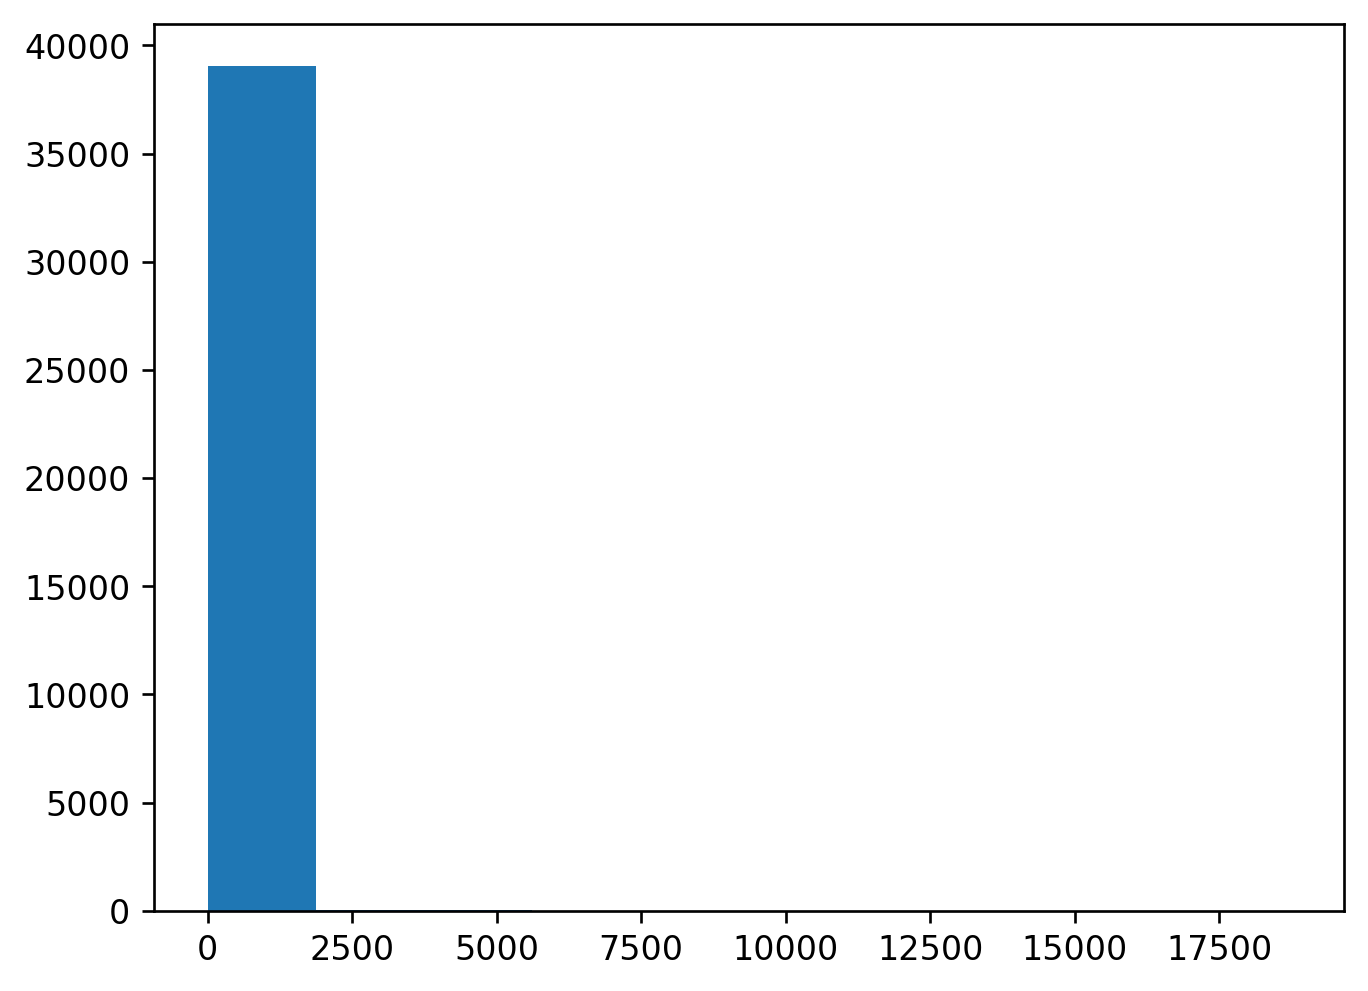

In [71]:
plt.hist(counts)
plt.show()

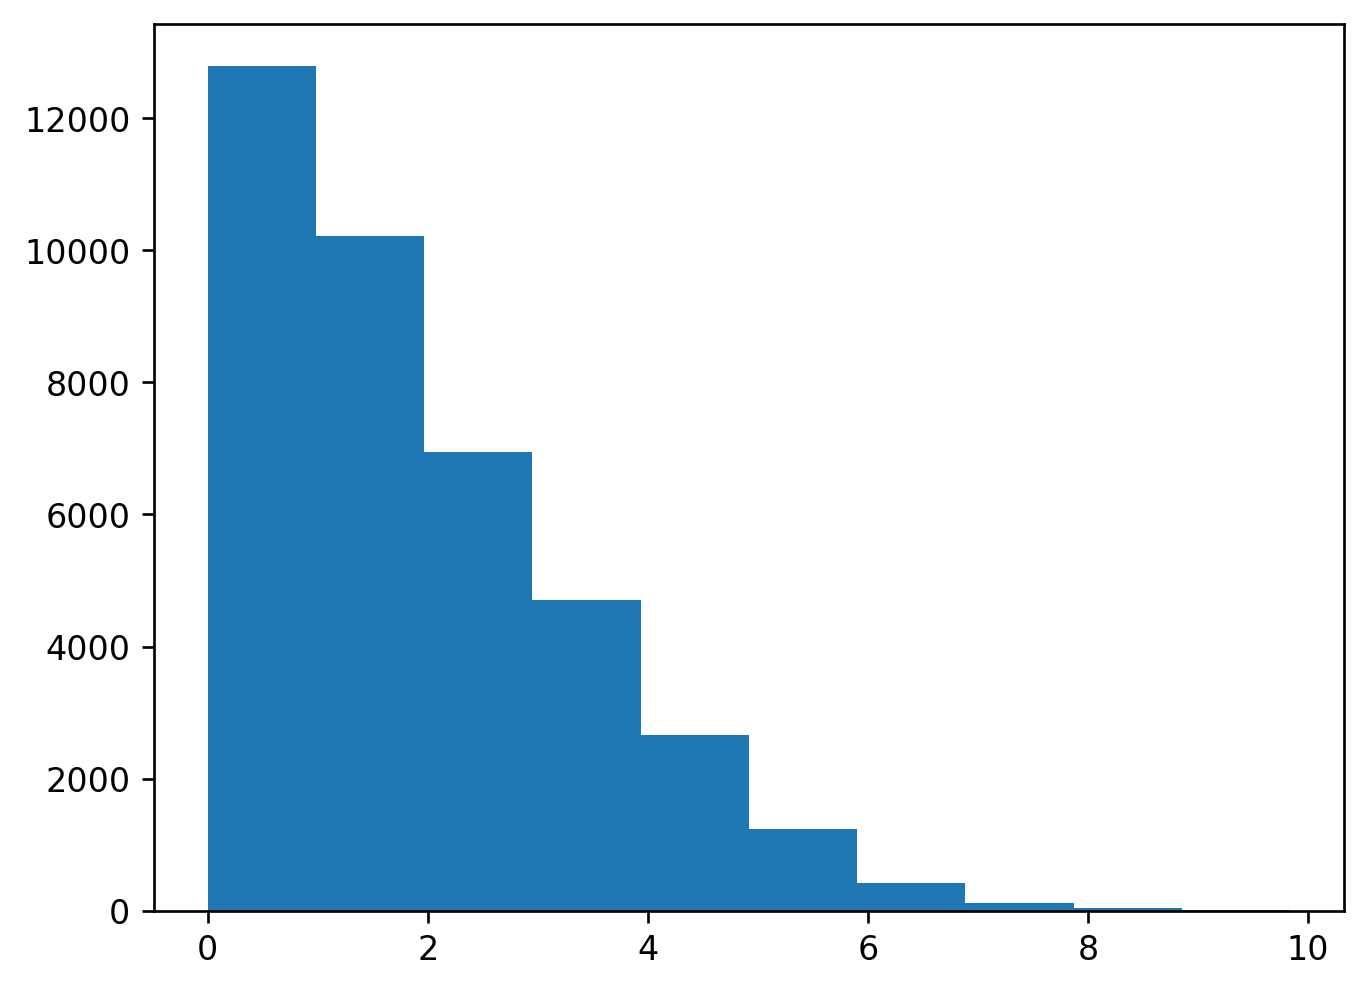

In [72]:
# we need a log transform because of the differences in the order of magnitudes between different counts
plt.hist(np.log(counts))
plt.show()

In [73]:
# how many transactions do we have?
len(named_orders['order_id'].unique())

131209

In [77]:
# we can apply Otsu's method to threshold the count values
# we need candidate percentiles
t = np.linspace(25,90,num=200)
cost = [] # this is not dollars
data = np.log(counts)

In [78]:
# now we generate all "cost" values
for i in t:
  data1 = data[data<np.percentile(data,i)]
  data2 = data[data>=np.percentile(data,i)]
  cost.append(i*np.var(data1)+(100-i)*np.var(data2))

In [81]:
v = counts[np.argmin(cost)]

In [80]:
t[np.argmin(cost)]

63.869346733668344

In [82]:
v

1183

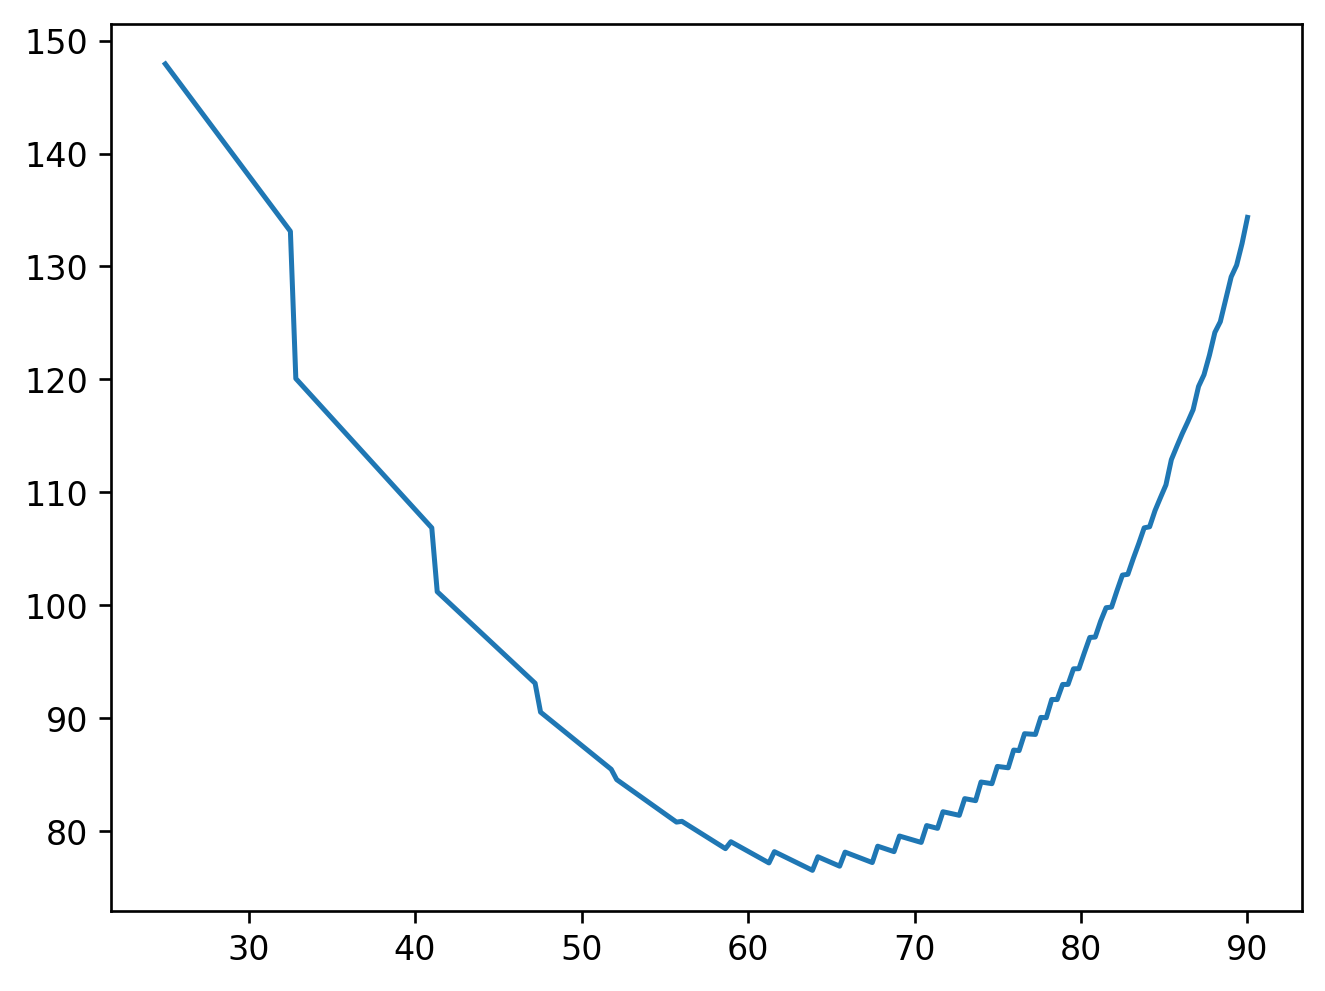

In [79]:
# plot the cost vs percentage
plt.plot(t,cost)
plt.show()

In [ ]:
cost

In [ ]:
p = t[np.argmin(cost)]
print('the percentage value for the chosen percentile  is : '+str(p))

the percentage value for the chosen percentile  is : 63.88888888888889


## Hardthresholding the most frequently transacted items

In [83]:
# here we create a hard threshold for the frequency of products being transacted
v = 300

In [84]:
counts

Banana                                           18726
Bag of Organic Bananas                           15480
Organic Strawberries                             10894
Organic Baby Spinach                              9784
Large Lemon                                       8135
                                                 ...  
Red Raspberry Syrup                                  1
Organic Montebello Penne Rigate Italian Pasta        1
ULTRACLEAN™ Arctic Mint Mouth Wash                   1
Torrential Tropical Punch                            1
Plain Golden Toasted Bread Crumbs                    1
Name: product_name, Length: 39123, dtype: int64

## Subsetting

We subset the dataframe based on the value of the hard threshold.

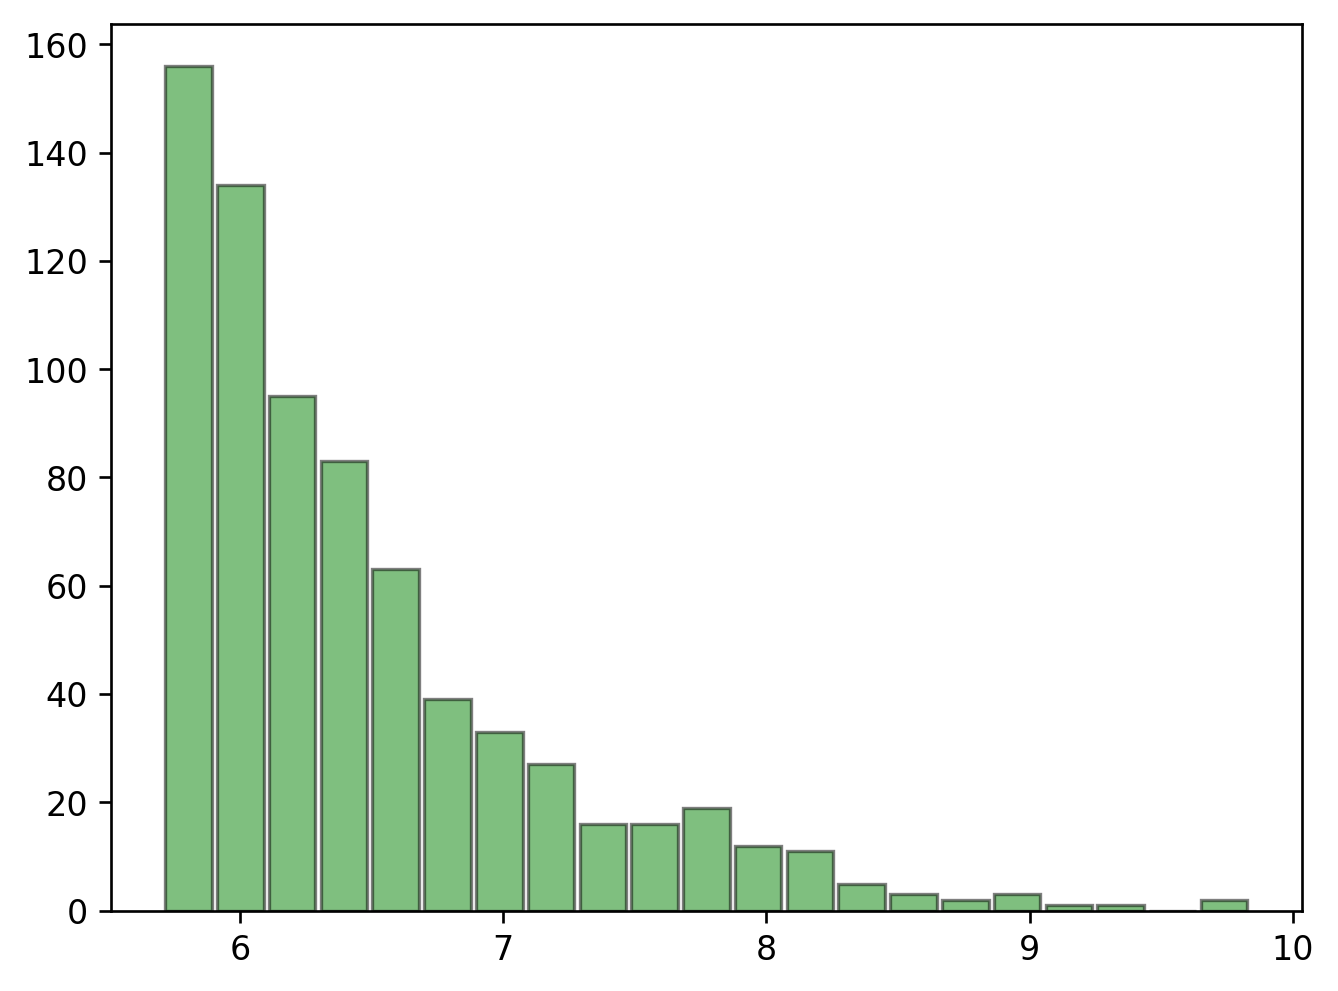

In [85]:
# we can visualize this the frequency distribution as a histogram and retain a list with the most frequently purchased
counts = counts[counts > v] # this is the thresholding part
plt.hist(np.log(counts.values), bins=21,color='green',edgecolor='k',rwidth=0.9,alpha=0.5)
plt.show()

In [86]:
counts

Banana                              18726
Bag of Organic Bananas              15480
Organic Strawberries                10894
Organic Baby Spinach                 9784
Large Lemon                          8135
                                    ...  
Organic Sliced Crimini Mushrooms      302
Sweet Rolls                           302
Sea Salt Caramel Gelato               302
Thin & Light Tortilla Chips           301
Whole Grain Oat Cereal                301
Name: product_name, Length: 721, dtype: int64

In [87]:
# IMPORTANT
# here we subset the "selected" orders
selected_orders = named_orders[named_orders['product_name'].isin(counts.index.values.tolist())]
selected_orders

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
152,1,10246,3,0,Organic Celery Hearts,83,4
153,2869,10246,4,1,Organic Celery Hearts,83,4
154,3378,10246,19,0,Organic Celery Hearts,83,4
155,14119,10246,6,0,Organic Celery Hearts,83,4
156,17152,10246,22,1,Organic Celery Hearts,83,4
...,...,...,...,...,...,...,...
1130238,3378984,18382,10,1,Saltine Crackers,78,19
1130239,3387730,18382,53,0,Saltine Crackers,78,19
1130240,3390509,18382,12,1,Saltine Crackers,78,19
1130241,3397058,18382,13,1,Saltine Crackers,78,19


## We need to extract the different transactions

We apply a pivotting of the data frame.

In [88]:
# here we pivot the data frame to see the products transacted in each purchase order
pd.options.mode.chained_assignment = None
selected_orders['cols'] = selected_orders.groupby('order_id').cumcount()
selected_pivot = selected_orders.pivot(index = 'order_id',columns = 'cols')[['product_name']]

In [89]:
selected_pivot

product_name  \
cols                                              0    
order_id                                               
1                              Organic Celery Hearts   
36                                      Spring Water   
38        Organic Raw Unfiltered Apple Cider Vinegar   
96                                    Roasted Turkey   
98                            Bag of Organic Bananas   
...                                              ...   
3421049                        Organic Baby Broccoli   
3421056                        Sparkling Lemon Water   
3421058                White Giant Paper Towel Rolls   
3421063                          Organic Half & Half   
3421070              Organic Unsweetened Almond Milk   

                                                                               \
cols                                             1                         2    
order_id                                                                        
1                                    Cucumber Kirby    Bag of Organic Bananas   
36                              Organic Half & Half        Super Greens Salad   
38                             Organic Baby Arugula  Organic Hot House Tomato   
96                                 Organic Cucumber    Organic Grape Tomatoes   
98                              Organic Raspberries      Natural Spring Water   
...                                             ...                       ...   
3421049   Organic Whole Grain Wheat English Muffins     Organic Baby Kale Mix   
3421056                                         NaN                       NaN   
3421058                              Sweet Potatoes                       NaN   
3421063                      Natural Artesian Water                       NaN   
3421070                        Creamy Peanut Butter        Broccoli Florettes   

                                                                          \
cols                                     3                            4    
order_id                                                                   
1                      Organic Hass Avocado  Organic Whole String Cheese   
36        Organic Garnet Sweet Potato (Yam)                    Asparagus   
38                               Green Peas             Bunched Cilantro   
96                      Organic Raspberries   Organic Whole Strawberries   
98          Organic Unsweetened Almond Milk                    Guacamole   
...                                     ...                          ...   
3421049                                 NaN                          NaN   
3421056                                 NaN                          NaN   
3421058                                 NaN                          NaN   
3421063                                 NaN                          NaN   
3421070                                 NaN                          NaN   

                                                             \
cols                       5                             6    
order_id                                                      
1                         NaN                           NaN   
36                        NaN                           NaN   
38        Flat Parsley, Bunch                           NaN   
96        Organic Blueberries                           NaN   
98                Black Beans  Organic Whole Grassmilk Milk   
...                       ...                           ...   
3421049                   NaN                           NaN   
3421056                   NaN                           NaN   
3421058                   NaN                           NaN   
3421063                   NaN                           NaN   
3421070                   NaN                           NaN   

                                                                      \
cols                                  7                           8    
order_id                    

In [90]:
# the total number of different products if we threshold at v
len(selected_pivot.columns)

43

## Preparing the list of purchases

In [91]:
# now we can get the list of the purchased items for each transaction
purchases = []
for i in range(0,len(selected_pivot)):
    purchases.append([str(selected_pivot.values[i,j]) for j in range(0,len(selected_pivot.columns))])

## Check your understanding

What is the variable 'purchases?'

ANSWER: it represents a list of lists.

In [92]:
# we got the list of all transactions called "purchases"
purchases[0]

['Organic Celery Hearts',
 'Cucumber Kirby',
 'Bag of Organic Bananas',
 'Organic Hass Avocado',
 'Organic Whole String Cheese',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [ ]:
# ex. purchased items in the ith transaction - only three items: Bananas, Pure Irish Butter and Michigan organic Kale
len(purchases[1])

48

## We need to clean the 'purchases' from the 'nans.'

In [93]:
# we want a clean list of transactions that is without any "nan" items
cleanList = []
for i in range(len(purchases)):
  cleanList.append([x for x in purchases[i] if str(x) != 'nan'])

In [94]:
cleanList[0]

['Organic Celery Hearts',
 'Cucumber Kirby',
 'Bag of Organic Bananas',
 'Organic Hass Avocado',
 'Organic Whole String Cheese']

## Application of the APRIORI Algorithm

In [95]:
# we are providing the clean list to the "apriori" algorithm
rules = apriori(cleanList, min_support = 0.01, min_confidence = 0.01, min_lift=2,max_length=2)

We are now ready for getting the association rules

In [ ]:
rules

<generator object apriori at 0x7f7673bf4a50>

In [96]:
# we need to unpack or 'list' the rules created.
results = list(rules)

## We got a structure with many nested lists

In [97]:
len(results)

13

In [106]:
results[0][2][0][2]

0.08191214470284237

The support of two items is

$$\text{P}(\text{both }A\text{ and } B):=\text{P}(A\cap B)=\text{P}(B\cap A)$$

The lift can be computed as:

$$\text{Lift}:=\frac{\text{P}(A\cap B)}{\text{P}(A)\cdot \text{P}(B)}$$

To establish a sense of the empirical causality we need the confidence, and we say that

$$A \implies B$$

if

$$\text{P}(B|A) > \text{P}(A|B)$$

In [ ]:
results

In [ ]:
# Bag of Org Bananas -> Org Haas Avocado and also we can explore Org Haas Avocado -> Bag Org. Bananas

In [ ]:
list(results[0].ordered_statistics[0].items_add)

['Organic Hass Avocado']

In [ ]:
items = [x for x in results[0]]

In [ ]:
items

['Organic Strawberries', 'Organic Raspberries']

In [ ]:
#results[0].ordered_statistics[0].confidence

In [113]:
results[0].ordered_statistics[1].confidence

0.2748753522653371

In [107]:
rules = 0
for result in results:
  supp   = int(result.support*10000)/100
  if result.ordered_statistics[0].confidence > result.ordered_statistics[1].confidence:
    i = 0
  else:
    i = 1
  conf   = int(result.ordered_statistics[i].confidence*100)
  hypo   = ''.join([x+' ' for x in result.ordered_statistics[i].items_base])
  conc   = ''.join([x+' ' for x in result.ordered_statistics[i].items_add])
  rules = rules + 1
  print("If "+str(hypo)+" is purchased, " +str(conf)+" % of the time " + str(conc)+" is purchased [support - " +
        str(supp)+"%]"+'  Lift: '+str(round(result.ordered_statistics[i].lift,2)))
print("Total rules built : " +str(rules))

If Organic Cucumber  is purchased, 27 % of the time Bag of Organic Bananas  is purchased [support - 1.07%]  Lift: 2.09
If Organic Hass Avocado  is purchased, 33 % of the time Bag of Organic Bananas  is purchased [support - 2.05%]  Lift: 2.52
If Organic Raspberries  is purchased, 32 % of the time Bag of Organic Bananas  is purchased [support - 1.51%]  Lift: 2.44
If Organic Strawberries  is purchased, 28 % of the time Bag of Organic Bananas  is purchased [support - 2.61%]  Lift: 2.14
If Honeycrisp Apple  is purchased, 34 % of the time Banana  is purchased [support - 1.04%]  Lift: 2.18
If Organic Fuji Apple  is purchased, 37 % of the time Banana  is purchased [support - 1.02%]  Lift: 2.33
If Limes  is purchased, 26 % of the time Large Lemon  is purchased [support - 1.35%]  Lift: 3.82
If Organic Avocado  is purchased, 18 % of the time Large Lemon  is purchased [support - 1.14%]  Lift: 2.63
If Organic Avocado  is purchased, 18 % of the time Organic Baby Spinach  is purchased [support - 1.19

## How to present the rules

In [108]:
nr = 0
confidence = []
lift = []
for item in results:
    pair = item[0]
    # We cannot seem to tell apriori to ignore NaN items, so we will refrain from printing results containing them
    # they will be returned as lower-case text "nan".
    if "nan" not in pair:
        if item[2][0][2] > item[2][1][2]:
          items = [x for x in pair]
          print("Rule: " + items[0] + " => " + items[1])

          #second index of the inner list
          print("Support: " + str(round(item[1]*100,2)) + "%")

          #third index of the list located at 0th
          #of the third index of the inner list
          confidence.append(round( item[2][0][2]*100,2))
          print("Confidence: " + str(round( item[2][0][2]*100,2)) + "%")
          lift.append(round( item[2][0][2]*100,2))
          print("Lift: " + str( round(item[2][0][3],2) ))
          nr += 1
        else:
          items = [x for x in pair]
          print("Rule: " + items[1] + " => " + items[0])

          #second index of the inner list
          print("Support: " + str(round(item[1]*100,2)) + "%")

          #third index of the list located at 0th
          #of the third index of the inner list
          confidence.append(round( item[2][1][2]*100,2))
          print("Confidence: " + str(round( item[2][1][2]*100,2)) + "%")
          lift.append(round( item[2][1][2]*100,2))
          print("Lift: " + str( round(item[2][1][3],2) ))
          nr += 1

Rule: Bag of Organic Bananas => Organic Cucumber
Support: 1.08%
Confidence: 27.49%
Lift: 2.09
Rule: Organic Hass Avocado => Bag of Organic Bananas
Support: 2.06%
Confidence: 33.18%
Lift: 2.52
Rule: Organic Raspberries => Bag of Organic Bananas
Support: 1.51%
Confidence: 32.1%
Lift: 2.44
Rule: Organic Strawberries => Bag of Organic Bananas
Support: 2.62%
Confidence: 28.22%
Lift: 2.14
Rule: Banana => Honeycrisp Apple
Support: 1.05%
Confidence: 34.67%
Lift: 2.18
Rule: Banana => Organic Fuji Apple
Support: 1.03%
Confidence: 37.15%
Lift: 2.33
Rule: Limes => Large Lemon
Support: 1.36%
Confidence: 26.44%
Lift: 3.82
Rule: Organic Avocado => Large Lemon
Support: 1.15%
Confidence: 18.21%
Lift: 2.63
Rule: Organic Avocado => Organic Baby Spinach
Support: 1.19%
Confidence: 18.92%
Lift: 2.27
Rule: Organic Baby Spinach => Organic Hass Avocado
Support: 1.07%
Confidence: 17.17%
Lift: 2.06
Rule: Organic Strawberries => Organic Blueberries
Support: 1.08%
Confidence: 25.55%
Lift: 2.76
Rule: Organic Hass A

In [ ]:
np.max(confidence)

37.15

## Example for the ECLAT algorithm in Python with real data

In [114]:
rule_count = 0
rules = eclat(cleanList, supp=1, zmin=2)
for i in range(0,len(rules)):
    supp = round(int(rules[i][1])/len(purchases)*100,3)
    items = rules[i][0]
    if "nan" not in items:
        rule_count = rule_count +1
        item_1 = rules[i][0][0]
        item_2 = rules[i][0][1]
        print("If "+str(item_1)+" is purchased, "+str(supp)+"% of the time " + str(item_2)+" is purchased [absolute support=" +str(rules[i][1])+"]")
print("Total rules built : " +str(rule_count))

If Organic Strawberries is purchased, 1.85% of the time Banana is purchased [absolute support=2174]
If Organic Strawberries is purchased, 2.615% of the time Bag of Organic Bananas is purchased [absolute support=3074]
If Organic Baby Spinach is purchased, 1.702% of the time Banana is purchased [absolute support=2000]
If Organic Baby Spinach is purchased, 1.902% of the time Bag of Organic Bananas is purchased [absolute support=2236]
If Organic Baby Spinach is purchased, 1.394% of the time Organic Strawberries is purchased [absolute support=1639]
If Large Lemon is purchased, 1.836% of the time Banana is purchased [absolute support=2158]
If Large Lemon is purchased, 1.053% of the time Organic Baby Spinach is purchased [absolute support=1238]
If Organic Avocado is purchased, 1.885% of the time Banana is purchased [absolute support=2216]
If Organic Avocado is purchased, 1.193% of the time Organic Baby Spinach is purchased [absolute support=1402]
If Organic Avocado is purchased, 1.148% of the

In [115]:
rules_e = eclat(purchases, supp=1, zmin=2)
eclat_final = [];
for item in rules_e:
    pair = item[0]
    if "nan" not in pair:
        #print(pair)
        eclat_final.append([item[0][0], item[0][1], item[1]])
eclat_final = pd.DataFrame(eclat_final, columns = ['Item1', 'Item2', 'Support'])
eclat_final.sort_values(by=['Support'],ascending=False)

,Item1,Item2,Support
1,Organic Strawberries,Bag of Organic Bananas,3074
10,Organic Hass Avocado,Bag of Organic Bananas,2420
3,Organic Baby Spinach,Bag of Organic Bananas,2236
7,Organic Avocado,Banana,2216
0,Organic Strawberries,Banana,2174
5,Large Lemon,Banana,2158
2,Organic Baby Spinach,Banana,2000
13,Strawberries,Banana,1948
16,Organic Raspberries,Bag of Organic Bananas,1780
17,Organic Raspberries,Organic Strawberries,1670
